In [29]:

import pandas as pd
import seaborn as sns 
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
import numpy as np
import plotly
import statistics
import plotly.express as px
import stats
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import plotly.express as px
import datetime
import datetime as dt
import time

#data from Kaggle.com
#open file
e='h.csv'
df=pd.read_csv(e)
#print(df)

In [30]:
#parse index
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
indexeddf=df.set_index(['Date'])
#print(indexeddf)

In [31]:
#parsing to time format and extracting dates 
x=df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%y')

Day=df['Date'].dt.day_name()
Month=df['Date'].dt.month_name()
Year=df['Date'].dt.year

In [32]:
df['Year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month_name()
df['Day']=df['Date'].dt.day_name()
#print(df)

In [33]:
base_color = sns.color_palette()[0]
country_order = df['Country '].value_counts().index
price_order=df['Service_price'].value_counts().index
month_order=df['Month'].value_counts().index
day_order=df['Day'].value_counts().index

In [34]:
df

,Date,Domain,Domain_code,Service_price,Country,Country_code,Year,Month,Day
0,2018-06-06,BI_consultant,117,85,Ger,303,2018,June,Wednesday
1,2018-06-03,BI_consultant,117,119,Ger,303,2018,June,Sunday
2,2018-06-06,Py_automation,101,30,Ger,303,2018,June,Wednesday
3,2018-06-06,Marketing_DA,104,65,Ger,303,2018,June,Wednesday
4,2018-06-06,Excel_Expert,102,29,Ger,303,2018,June,Wednesday
...,...,...,...,...,...,...,...,...,...
144,2020-06-06,BI_consultant,117,65,Belgium,300,2020,June,Saturday
145,2020-06-07,BI_consultant,117,60,Belgium,300,2020,June,Sunday
146,2020-06-08,BI_consultant,117,80,Belgium,300,2020,June,Monday
147,2020-06-09,BI_consultant,117,55,Belgium,300,2020,June,Tuesday


In [35]:
df.Domain

0      BI_consultant
1      BI_consultant
2      Py_automation
3       Marketing_DA
4       Excel_Expert
           ...      
144    BI_consultant
145    BI_consultant
146    BI_consultant
147    BI_consultant
148    BI_consultant
Name: Domain, Length: 149, dtype: object

In [36]:
df =df.loc[df['Domain'].isin(domain_order[:6])] #showing first 6 elements 

NameError: name 'domain_order' is not defined

In [37]:
df.Domain

0      BI_consultant
1      BI_consultant
2      Py_automation
3       Marketing_DA
4       Excel_Expert
           ...      
144    BI_consultant
145    BI_consultant
146    BI_consultant
147    BI_consultant
148    BI_consultant
Name: Domain, Length: 149, dtype: object

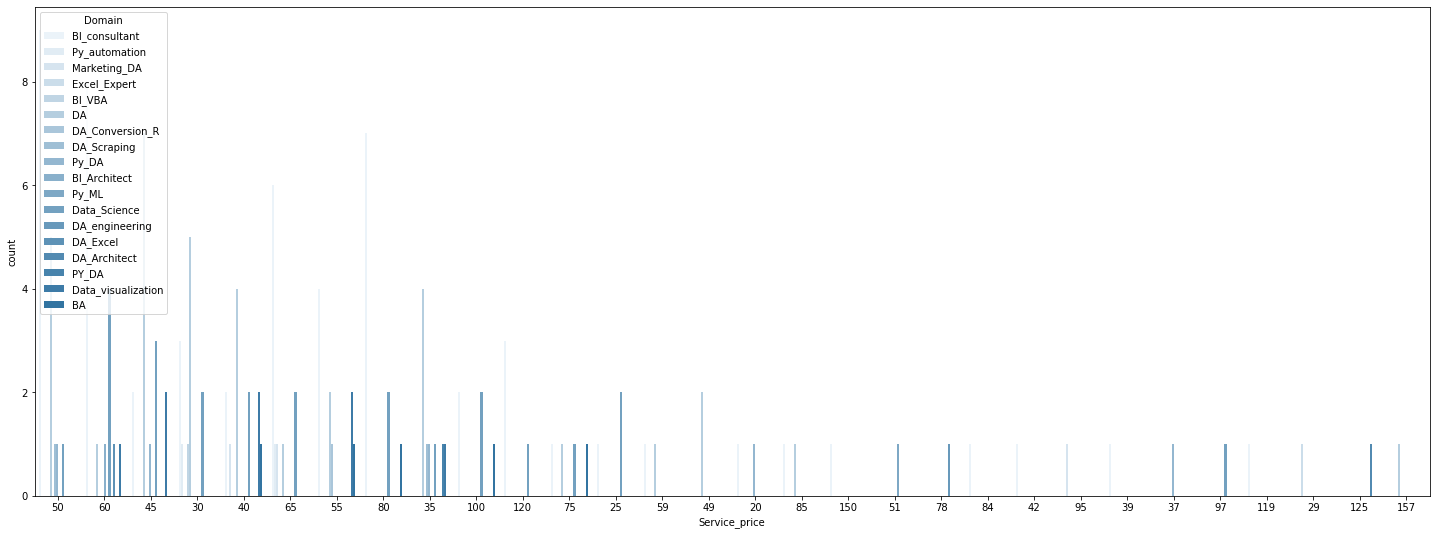

In [38]:
plt.figure(figsize=(25,9))
sns.countplot(data = df, x = 'Service_price', hue = 'Domain',color=base_color,order=price_order)

In [39]:
df =df.loc[df['Country '].isin(country_order[:6])]

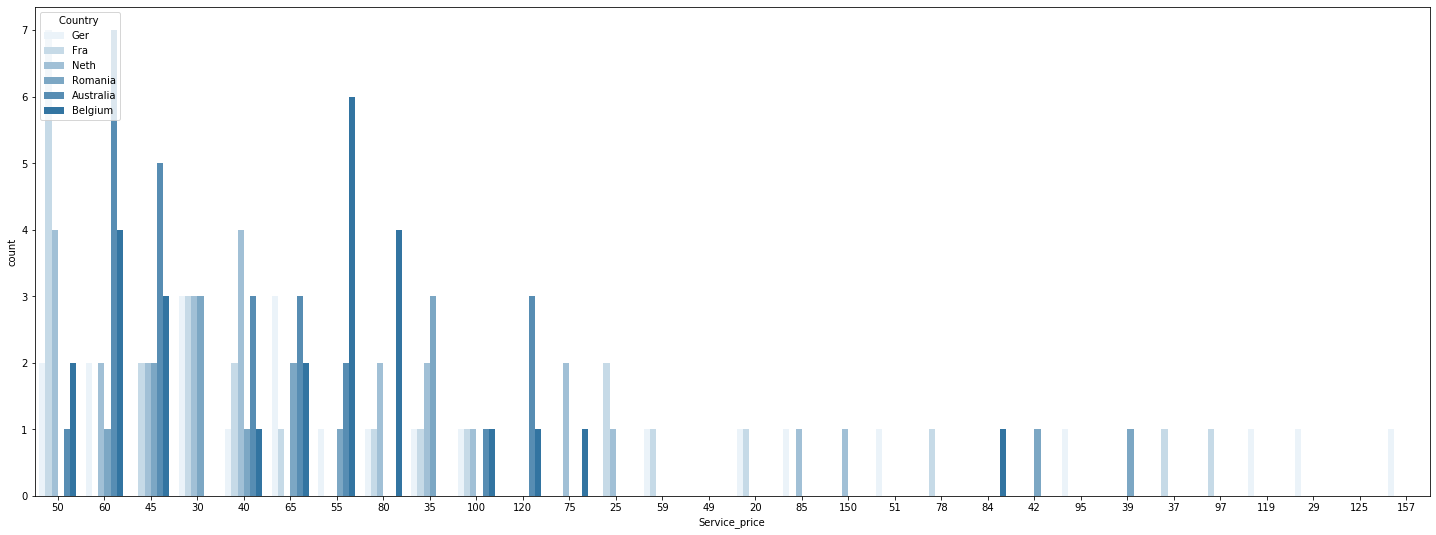

In [40]:
plt.figure(figsize=(25,9))
sns.countplot(data = df, x = 'Service_price', hue = 'Country ',color=base_color,order=price_order)

In [41]:

vax_path='vaccinations.csv'
vax=pd.read_csv(vax_path)
#print(vax)

In [91]:
#parse index
vax['date']=pd.to_datetime(vax['date'], infer_datetime_format=True)
indexeddf=vax.set_index(['date'])
#print(indexeddf)

#parsing to time format and extracting dates 
x=vax['date']=pd.to_datetime(vax['date'], format='%d-%m-%y')

Day=vax['date'].dt.day_name()
Month=vax['date'].dt.month_name()
Year=vax['date'].dt.year

In [103]:

vax['Year']=vax['date'].dt.year
vax['Month']=vax['date'].dt.month_name()
vax['Day']=vax['date'].dt.day_name()
#print(vax)

In [117]:
base_color = sns.color_palette()[0]
vaccine_order = vax['vaccines'].value_counts().index
country_order = vax['country'].value_counts().index
month_order = vax['Month'].value_counts().index
vax =vax.loc[vax['country'].isin(country_order[:35])]
vax =vax.loc[vax['vaccines'].isin(vaccine_order[:10])]

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text xticklabel objects>)

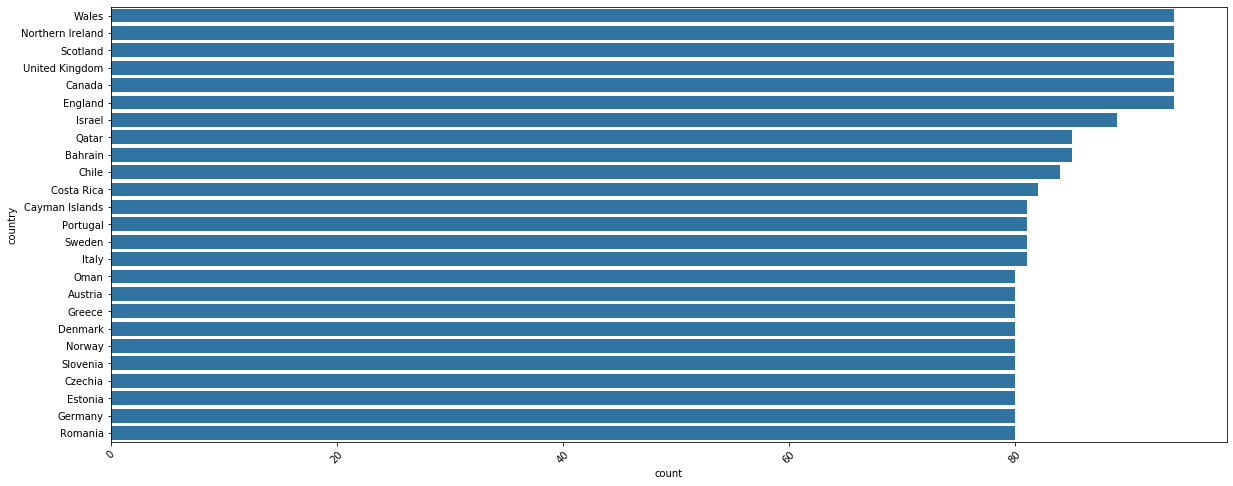

In [118]:
plt.figure(figsize=(20,8))
sns.countplot(data=vax,y='country',color=base_color,order=country_order)
plt.xticks(rotation=45)

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800., 900.]),
 <a list of 10 Text xticklabel objects>)

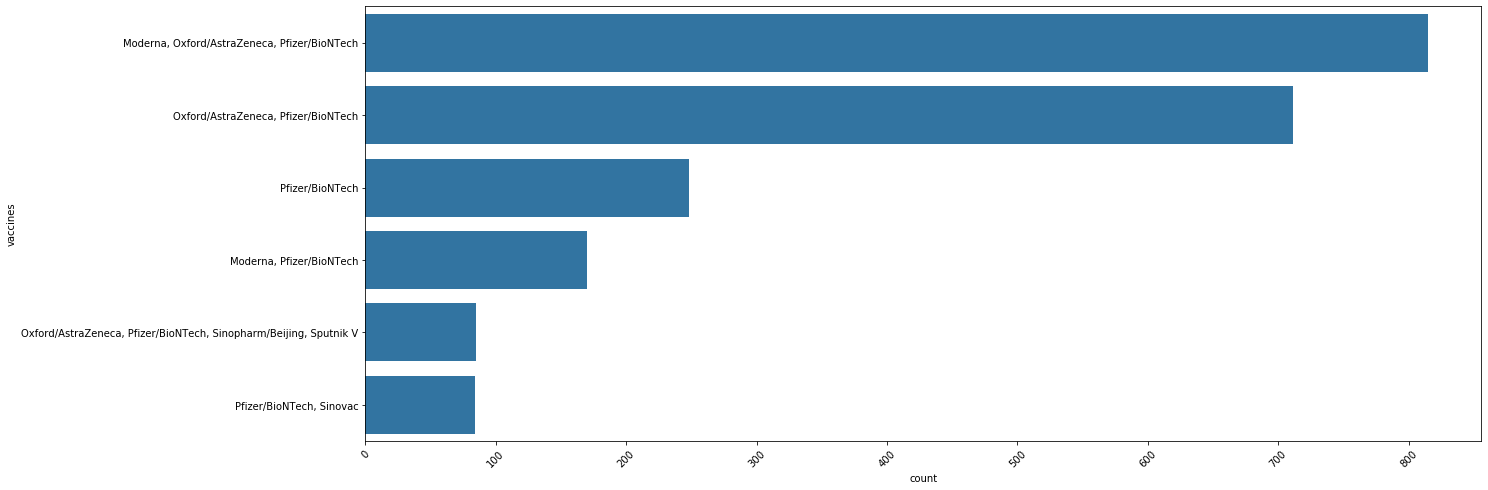

In [119]:
plt.figure(figsize=(20,8))
sns.countplot(data=vax,y='vaccines',color=base_color,order=vaccine_order)
plt.xticks(rotation=45)

In [120]:
co_counts = vax.groupby(['country', 'vaccines']).size()
co_counts = co_counts.reset_index(name='count')
co_counts = co_counts.pivot(index = 'country', columns = 'vaccines', values = 'count')
co_counts.head()

vaccines,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech","Moderna, Pfizer/BioNTech","Oxford/AstraZeneca, Pfizer/BioNTech","Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V",Pfizer/BioNTech,"Pfizer/BioNTech, Sinovac"
country,,,,,,
Austria,80.0,NaN,NaN,NaN,NaN,NaN
Bahrain,NaN,NaN,NaN,85.0,NaN,NaN
Canada,94.0,NaN,NaN,NaN,NaN,NaN
Cayman Islands,NaN,NaN,NaN,NaN,81.0,NaN
Chile,NaN,NaN,NaN,NaN,NaN,84.0


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

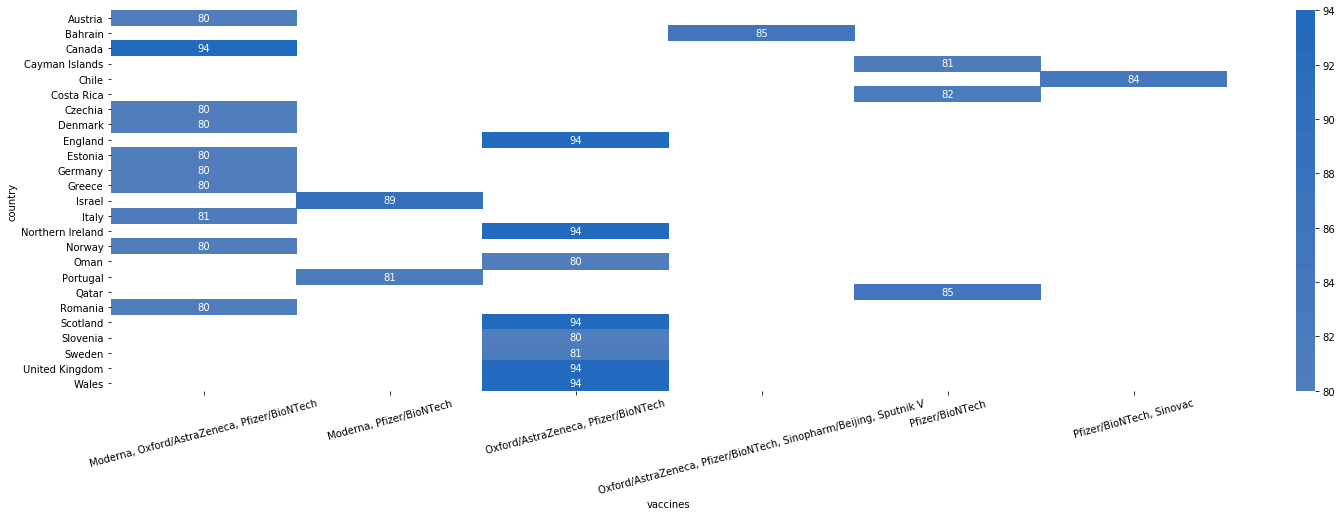

In [121]:
plt.figure(figsize=(25,7))
sns.heatmap(co_counts, annot = True, cmap = 'vlag_r', center = 0)
plt.xticks(rotation=15)

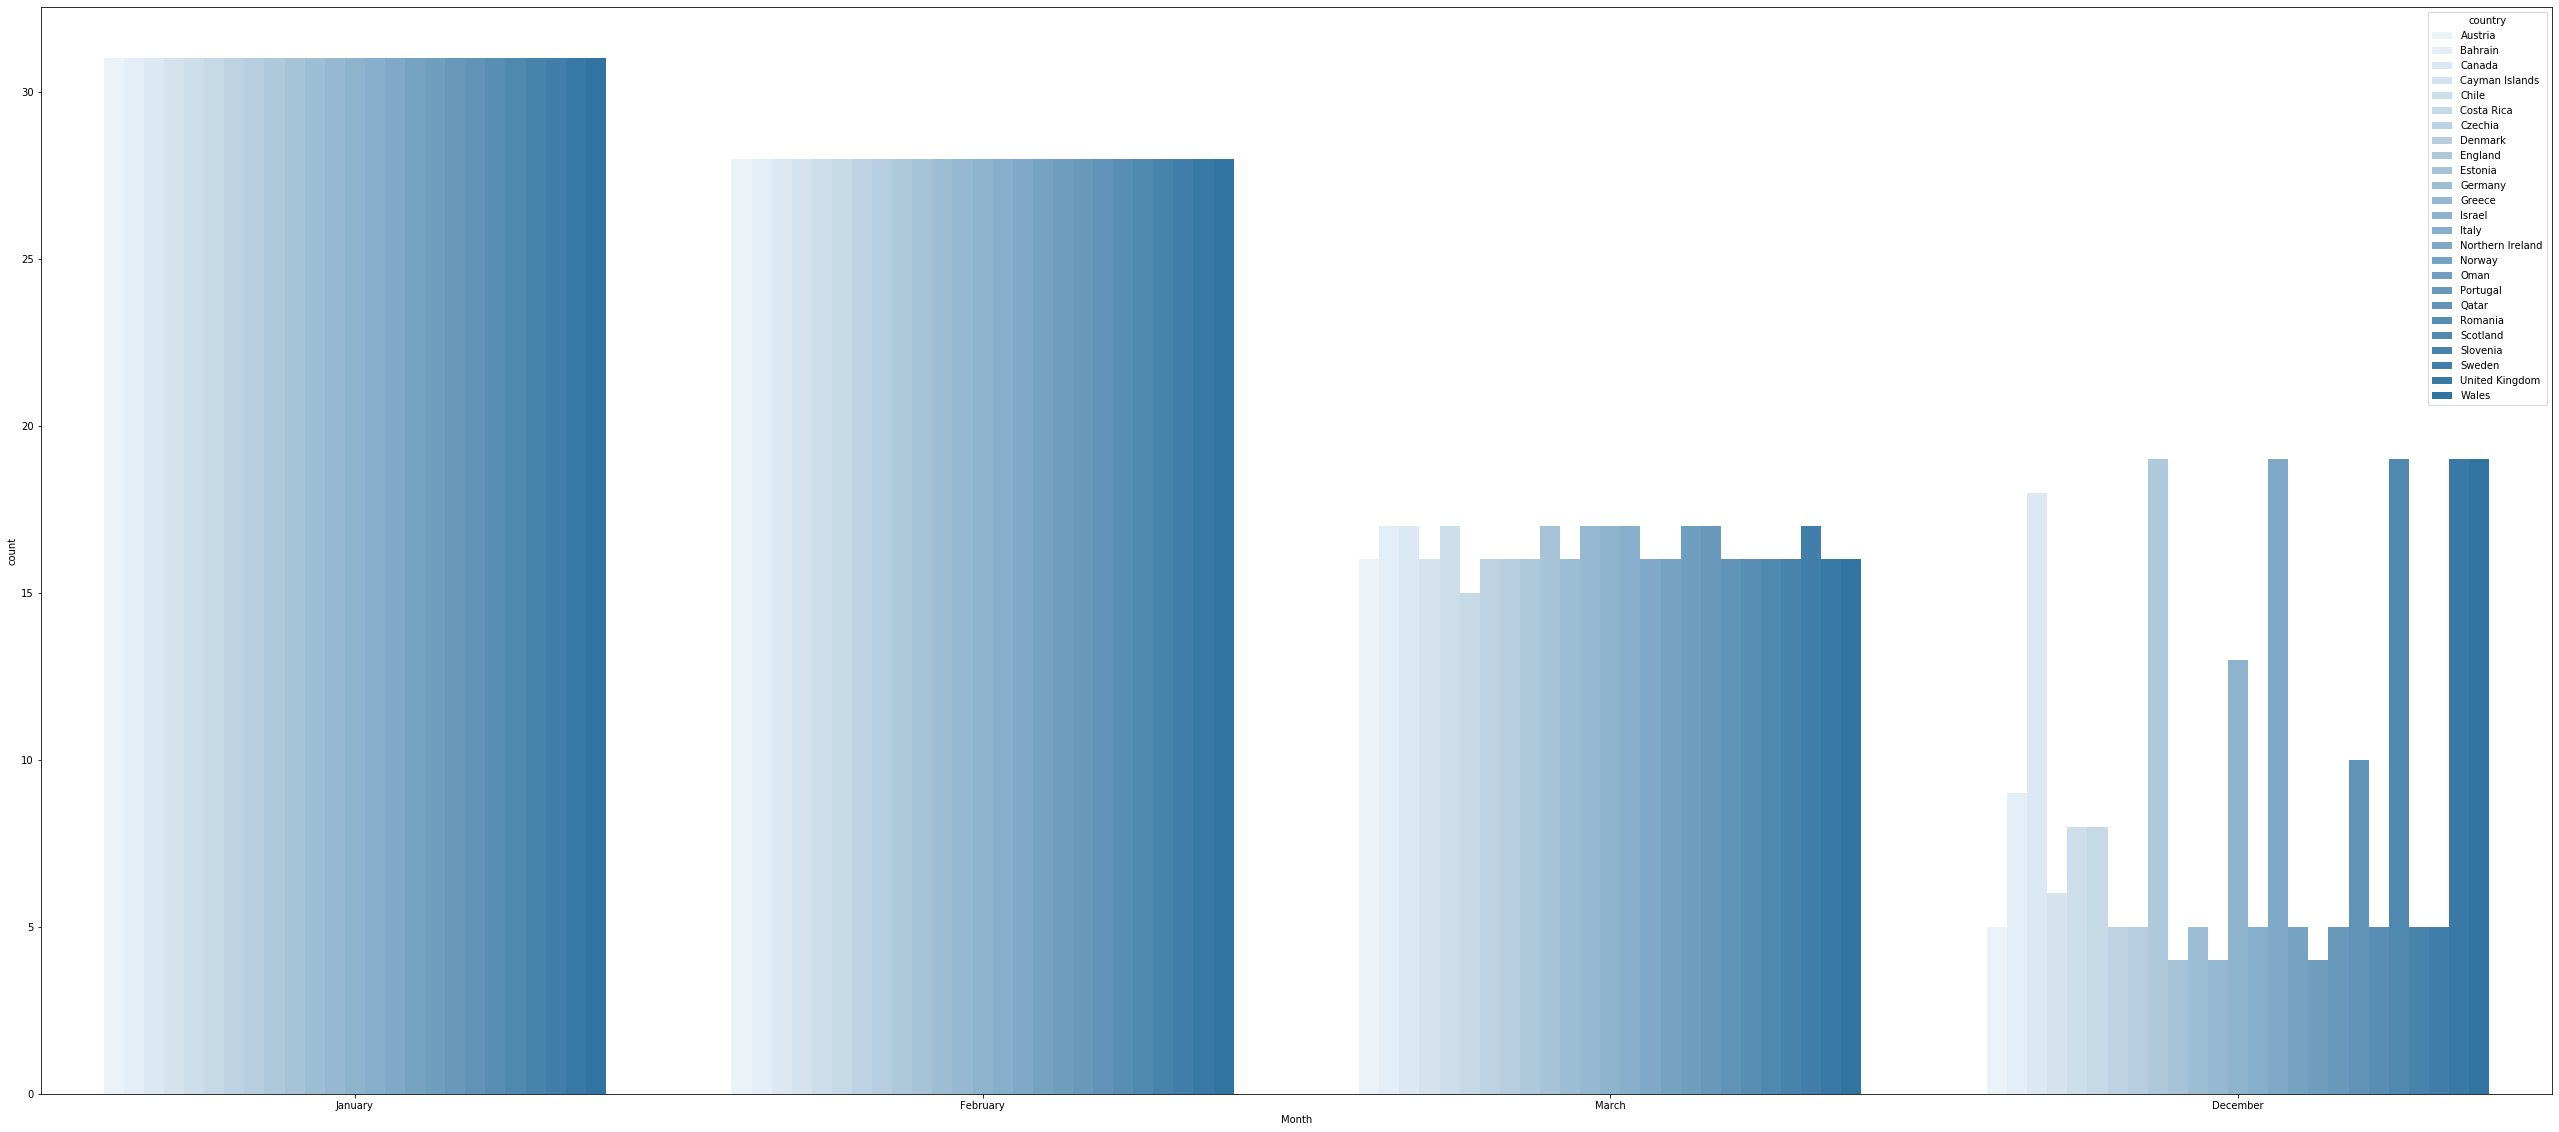

In [133]:
plt.figure(figsize=(45,20))
sns.countplot(data = vax, x = 'Month', hue = 'country',color=base_color,order=month_order)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

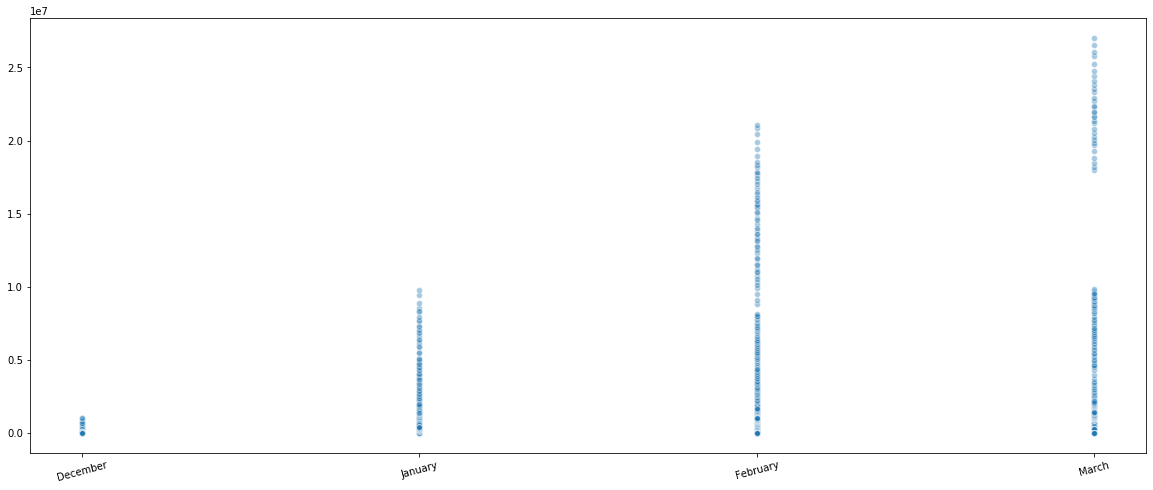

In [122]:
plt.figure(figsize=(20,8))
plt.scatter(data = vax, y = 'total_vaccinations', x = 'Month', marker='o',edgecolors='white',alpha=0.7/1.8)
plt.xticks(rotation=15)

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000.]),
 <a list of 8 Text xticklabel objects>)

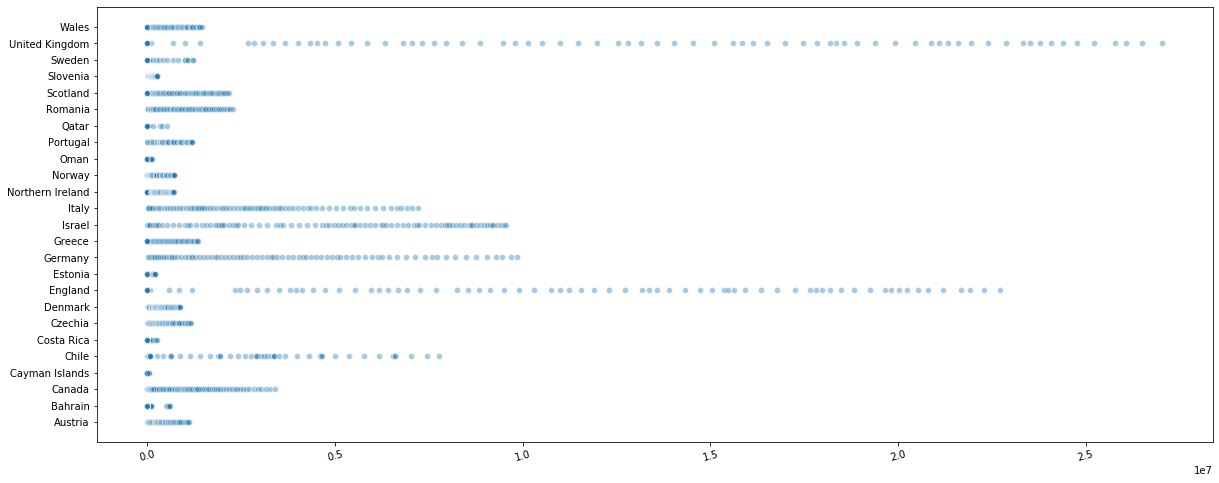

In [123]:
plt.figure(figsize=(20,8))
plt.scatter(data = vax, y = 'country', x = 'total_vaccinations', marker='o',edgecolors='white',alpha=0.7/1.8)
plt.xticks(rotation=15)

(array([-1000000.,        0.,  1000000.,  2000000.,  3000000.,  4000000.,
         5000000.]),
 <a list of 7 Text xticklabel objects>)

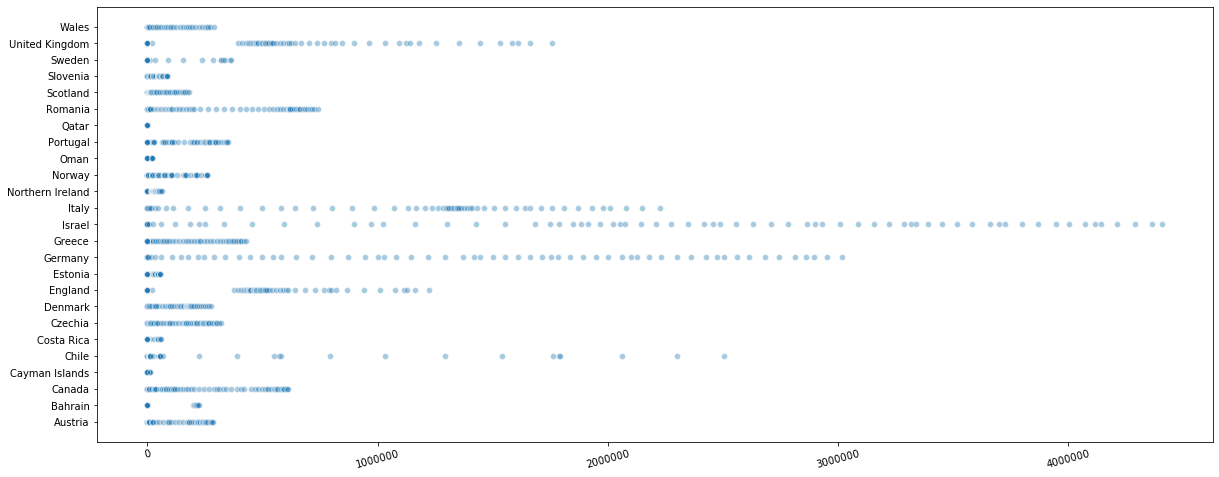

In [124]:
plt.figure(figsize=(20,8))
plt.scatter(data = vax, y = 'country', x = 'people_fully_vaccinated', marker='o',edgecolors='white',alpha=0.7/1.8)
plt.xticks(rotation=15)